In [1]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading dataset
df=pd.read_csv('formatted_flights.csv',low_memory=False,index_col=0)
df.head(10)

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.
5,12.0,United Air Lines Inc.
6,19.0,JetBlue Airways
7,-14.0,ExpressJet Airlines Inc.
8,-8.0,JetBlue Airways
9,8.0,American Airlines Inc.


In [3]:
df.arr_delay.describe()

count    317113.000000
mean          1.297143
std          29.064401
min         -60.000000
25%         -17.000000
50%          -6.000000
75%          11.000000
max         120.000000
Name: arr_delay, dtype: float64

In [4]:
#checking null values
df.isnull().sum()

arr_delay    0
name         0
dtype: int64

In [5]:
# checking unique airlines present in the dataset 
df.loc[:,'name'].unique()

array(['United Air Lines Inc.', 'American Airlines Inc.',
       'JetBlue Airways', 'Delta Air Lines Inc.',
       'ExpressJet Airlines Inc.', 'Envoy Air', 'US Airways Inc.',
       'Southwest Airlines Co.', 'Virgin America',
       'AirTran Airways Corporation', 'Alaska Airlines Inc.',
       'Endeavor Air Inc.', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'Mesa Airlines Inc.',
       'SkyWest Airlines Inc.'], dtype=object)

C:\Users\kusha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'delay(min)')

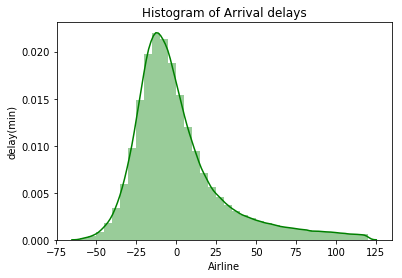

In [6]:
#histogram for delays
sns.distplot(df['arr_delay'],color='green',bins=int(180/5))
plt.title('Histogram of Arrival delays')
plt.xlabel('Airline')
plt.ylabel('delay(min)')

In [7]:
# including all flights which are on time in a new dataset
flights_on_time=df.loc[df.arr_delay<=0]
flights_on_time.head()

,arr_delay,name
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.
7,-14.0,ExpressJet Airlines Inc.
8,-8.0,JetBlue Airways
10,-2.0,JetBlue Airways


In [8]:
# including all flights which are delayed in a new dataset
delayed_flights=df.loc[df.arr_delay>0]
delayed_flights.head()

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
5,12.0,United Air Lines Inc.
6,19.0,JetBlue Airways


In [9]:
#counting no of flights according to delay time
no_of_flights_ontime=flights_on_time.name.value_counts()
total_flights=df.name.value_counts()
no_of_delayed_flights=delayed_flights.name.value_counts()

In [10]:
#calculating probability if a flight will be on time or not
prob_ontime=(no_of_flights_ontime/total_flights)
prob_delay=(no_of_delayed_flights/total_flights)
prob_ontime.head()

AirTran Airways Corporation    0.423701
Alaska Airlines Inc.           0.741655
American Airlines Inc.         0.680162
Delta Air Lines Inc.           0.671365
Endeavor Air Inc.              0.642418
Name: name, dtype: float64

In [11]:
#plotting the results for some selected airlines
plt.rcParams['figure.figsize'] = 15, 12
subset = prob_ontime.loc[prob_ontime>0.6]
subset.head()

Alaska Airlines Inc.      0.741655
American Airlines Inc.    0.680162
Delta Air Lines Inc.      0.671365
Endeavor Air Inc.         0.642418
Hawaiian Airlines Inc.    0.722892
Name: name, dtype: float64

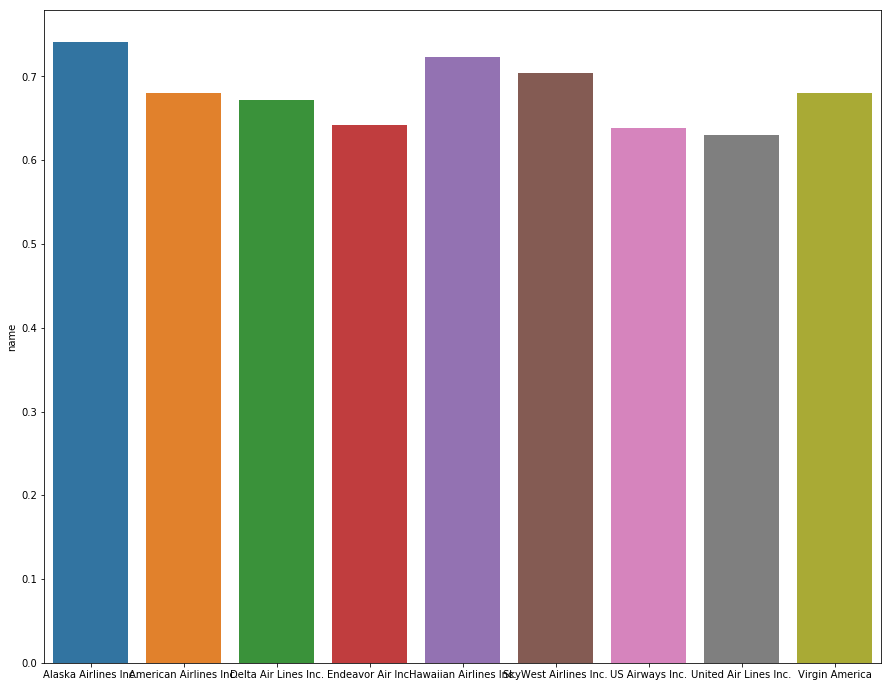

In [12]:
on_time=sns.barplot(x=subset.index,y=subset)

## Selection on the basis of above barplot
#### It can be observed that Alaskan Airlines has the highest probability of 
#### having either no delay or negative delay. Thus, Alaskan Airlines would be my best choice.
Hawaiian Airlines and Sky West Airlines will be the second and third choices repectively.

# Demostrating 4 aspects of Central Limit Theorem

In [13]:
# making sampling distribution for sample size=30
mean_vec=[]
std_dev=[]
for i in range(1,3001):
    samp= df.sample(30)   
    mean_vec.append(samp['arr_delay'].mean())
    std_dev.append(samp['arr_delay'].std())


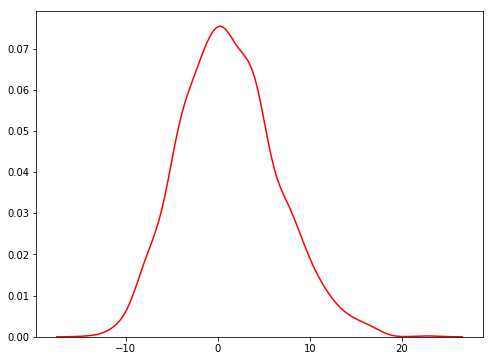

In [17]:
# plotting sampling distributions 
plt.rcParams['figure.figsize'] = 8,6
sample_mean_pot= sns.distplot(mean_vec,color="red",kde=True, hist=False)

## 1st Aspect
#### -> Sampling distribution of the mean will be less spread. => TRUE
## 2nd Aspect
#### -> Sampling distribution will be well modeled by a normal distribution. => TRUE

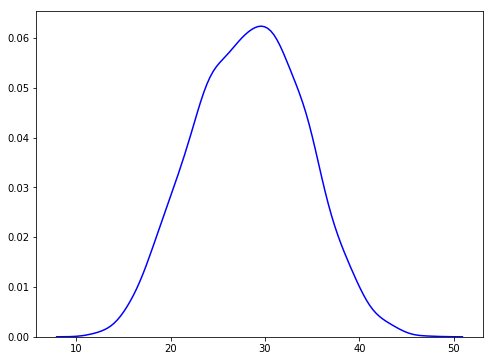

In [18]:
# sample size is 30
smaple_std_plot= sns.distplot(std_dev,color="blue",kde=True,hist=False)

In [19]:
# making sampling distribution for sample size=50
mean_vec=[]
std_dev=[]
for i in range(1,3001):
    samp= df.sample(50)   
    mean_vec.append(samp['arr_delay'].mean())
    std_dev.append(samp['arr_delay'].std())

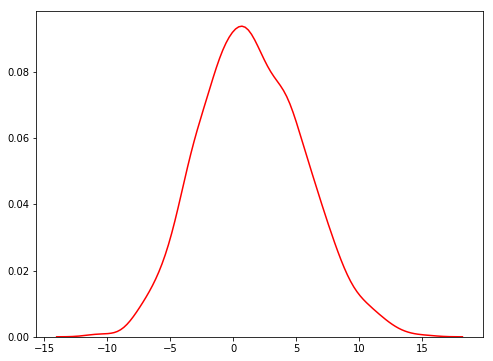

In [20]:
sample_mean_pot= sns.distplot(mean_vec,color="red",kde=True, hist=False)

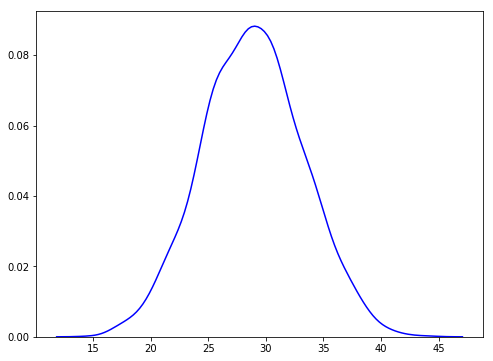

In [21]:
# sample size is 50
smaple_std_plot= sns.distplot(std_dev,color="blue",kde=True,hist=False)

In [22]:
# making sampling distribution for sample size=1000
mean_vec=[]
std_dev=[]
for i in range(1,3001):
    samp= df.sample(1000)   
    mean_vec.append(samp['arr_delay'].mean())
    std_dev.append(samp['arr_delay'].std())

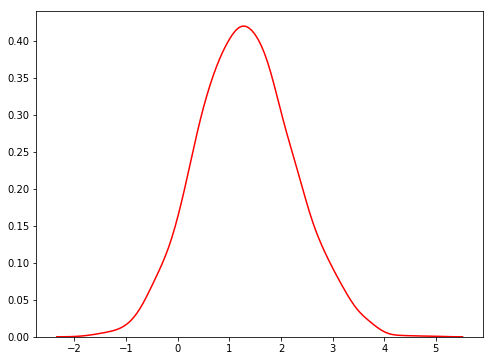

In [23]:
sample_mean_pot= sns.distplot(mean_vec,color="red",kde=True, hist=False)

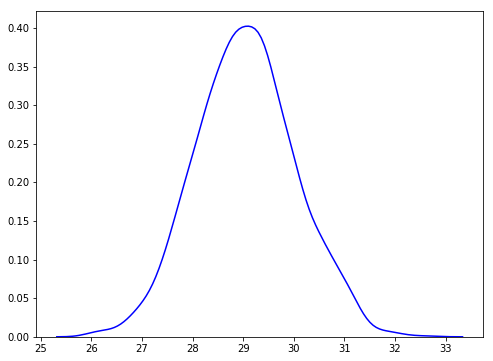

In [24]:
# sample size is 50
smaple_std_plot= sns.distplot(std_dev,color="blue",kde=True,hist=False)

In [25]:
# comparing mean of original population and the sampling distribution
mean_vec=pd.Series(mean_vec)
print(mean_vec.mean())
print(df['arr_delay'].mean())

1.3097810000000014
1.2971432896160044


In [26]:
# comparing standard deviation of original population and the sampling distribution
print(mean_vec.std())
print(df['arr_delay'].std())

0.9284547616625257
29.064401023259187


## Third Aspect
#### -> spread of the sampling distribution is related to the spread os the population values.
####     mean(population) ~ mean(sampling_distribution)
####     std(population) ~ std(sampling_distribution)*sqrt(n) # where n is 1000

## Fourth Aspect
#### -> Bigger samples lead to smaller spread in the sampling distributions.
#### This is evident from the above plotted distribtion as well as the relation for standard deviation in the third aspect.